Question: What do the trends of fish extraction for each continent indicate about future numbers?

Dataset:
From: Food and Agriculture Organization of the United Nations(FAO)
FAO Fisheries & Aquaculture - Global aquaculture production Quantity (1950 - 2021)

https://www.fao.org/fishery/statistics-query/en/aquaculture/aquaculture_quantity 


In [25]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [26]:
aqua = pd.read_excel("aquaculture_quantity.xlsx")

aqua.dropna(inplace=True)

aqua.head()

c:\Users\Intna\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Country Name En,Continent Name En,Unit Name,2021,2021 Flag,2020,2020 Flag,2019,2019 Flag,2018,2018 Flag,2017,2017 Flag
2,Yemen,Asia,Tonnes - live weight,10.0,E,10.0,E,10.0,E,10.0,E,5.0,E
4,Venezuela (Boliv Rep of),Americas,Tonnes - live weight,53601.0,E,40261.0,E,33636.0,E,25911.0,E,27000.0,E
6,Uzbekistan,Asia,Tonnes - live weight,118933.0,E,98003.0,E,81717.0,E,57384.0,E,52450.0,E
7,US Virgin Islands,Americas,Tonnes - live weight,8.0,E,8.0,E,8.0,E,8.0,E,8.0,E
15,Tuvalu,Oceania,Tonnes - live weight,1.0,E,1.0,E,2.5,E,2.5,E,2.5,E


Cleaning data

In [88]:
df = aqua

df = df.iloc[:, [0, 1, 3, 5, 7, 9, 11]]

df['Africa'] = False
df.loc[df['Continent Name En'] == 'Africa', 'Africa'] = True

df['Asia'] = False
df.loc[df['Continent Name En'] == 'Asia', 'Asia'] = True

df['Americas'] = False
df.loc[df['Continent Name En'] == 'Americas', 'Americas'] = True

df['Oceania'] = False
df.loc[df['Continent Name En'] == 'Oceania', 'Oceania'] = True

df['Europe'] = False
df.loc[df['Continent Name En'] == 'Europe', 'Europe'] = True

df.rename(columns={'Continent Name En': 'Continent'}, inplace=True)

df.rename(columns={'Country Name En': 'Country'}, inplace=True)

#df.rename(columns={'2017': 'yr17'}, inplace=True)

#df.rename(columns={'2018': 'yr18'}, inplace=True)

#df.rename(columns={'2019': 'yr19'}, inplace=True)

#df.rename(columns={'2020': 'yr20'}, inplace=True)

#df.rename(columns={'2021': 'yr21'}, inplace=True)


df.head()

C:\Users\Intna\AppData\Local\Temp\ipykernel_11044\1282654033.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Africa'] = False
C:\Users\Intna\AppData\Local\Temp\ipykernel_11044\1282654033.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Asia'] = False
C:\Users\Intna\AppData\Local\Temp\ipykernel_11044\1282654033.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,Country,Continent,2021,2020,2019,2018,2017,Africa,Asia,Americas,Oceania,Europe
2,Yemen,Asia,10.0,10.0,10.0,10.0,5.0,False,True,False,False,False
4,Venezuela (Boliv Rep of),Americas,53601.0,40261.0,33636.0,25911.0,27000.0,False,False,True,False,False
6,Uzbekistan,Asia,118933.0,98003.0,81717.0,57384.0,52450.0,False,True,False,False,False
7,US Virgin Islands,Americas,8.0,8.0,8.0,8.0,8.0,False,False,True,False,False
15,Tuvalu,Oceania,1.0,1.0,2.5,2.5,2.5,False,False,False,True,False


Attaching identifying numbers for each continent

In [166]:
df['continent'] = pd.Categorical(df['Continent'])

df['continent_num'] = pd.factorize(df['continent'])[0] + 1

df.head()

,Country,Continent,2021,2020,2019,2018,2017,Africa,Asia,Americas,Oceania,Europe,continent,continent_num
2,Yemen,Asia,10.0,10.0,10.0,10.0,5.0,False,True,False,False,False,Asia,1
4,Venezuela (Boliv Rep of),Americas,53601.0,40261.0,33636.0,25911.0,27000.0,False,False,True,False,False,Americas,2
6,Uzbekistan,Asia,118933.0,98003.0,81717.0,57384.0,52450.0,False,True,False,False,False,Asia,1
7,US Virgin Islands,Americas,8.0,8.0,8.0,8.0,8.0,False,False,True,False,False,Americas,2
15,Tuvalu,Oceania,1.0,1.0,2.5,2.5,2.5,False,False,False,True,False,Oceania,3


Summing the values of each year for a continent, separating them and then merging them into a new dataset.

In [117]:
result17 = df.groupby('continent_num')['2017'].sum()
pd.DataFrame(result17)

result18 = df.groupby('continent_num')['2018'].sum()
pd.DataFrame(result18)

result19 = df.groupby('continent_num')['2019'].sum()
pd.DataFrame(result19)

result20 = df.groupby('continent_num')['2020'].sum()
pd.DataFrame(result20)

result21 = df.groupby('continent_num')['2021'].sum()
pd.DataFrame(result21)

,2021
continent_num,
1,1302546.5
2,62488.0
3,6427.7
4,112357.0
5,156350.0


In [204]:
yr_merged = pd.merge(result17, result18, on="continent_num")
yr_merged = pd.merge(yr_merged, result19, on="continent_num")
yr_merged = pd.merge(yr_merged, result20, on="continent_num")
yr_merged = pd.merge(yr_merged, result21, on="continent_num")

print(yr_merged)

                      2017       2018       2019       2020       2021
continent_num                                                         
1              1007965.500  1123265.5  1207354.5  1325360.5  1302546.5
2                35150.500    34353.5    42346.0    48864.1    62488.0
3                 6426.803     6311.8     6353.0     6419.7     6427.7
4                71515.000    92998.0    70859.0    84824.0   112357.0
5               139051.000   132460.0   141435.0   128995.0   156350.0


Creating a dataplot to visualize the fishery numbers of each continent through the years.

continent_num          1        2         3         4         5
2017           1007965.5  35150.5  6426.803   71515.0  139051.0
2018           1123265.5  34353.5  6311.800   92998.0  132460.0
2019           1207354.5  42346.0  6353.000   70859.0  141435.0
2020           1325360.5  48864.1  6419.700   84824.0  128995.0
2021           1302546.5  62488.0  6427.700  112357.0  156350.0


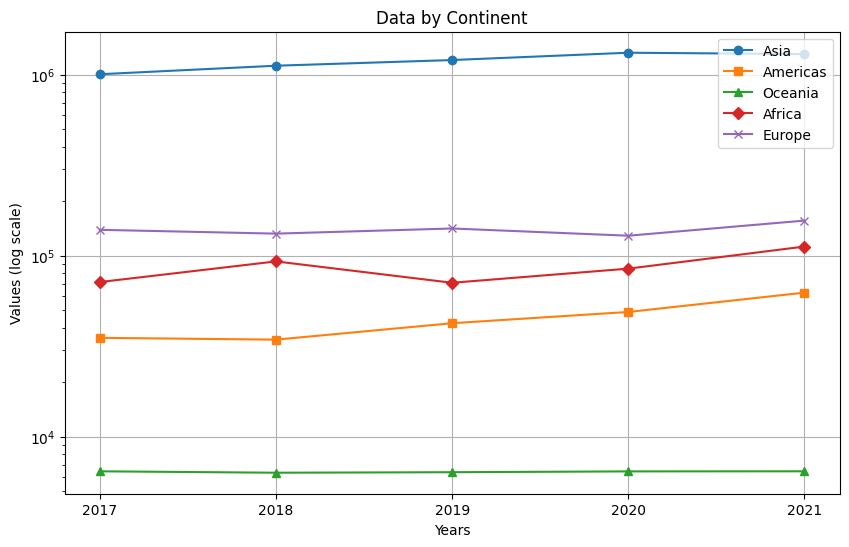

In [205]:
df_transposed = yr_merged.transpose()
print(df_transposed)

plt.figure(figsize=(10, 6))
plt.semilogy(df_transposed.index, df_transposed[1], label="Asia", marker="o")
plt.semilogy(df_transposed.index, df_transposed[2], label="Americas", marker="s")
plt.semilogy(df_transposed.index, df_transposed[3], label="Oceania", marker="^")
plt.semilogy(df_transposed.index, df_transposed[4], label="Africa", marker="D")
plt.semilogy(df_transposed.index, df_transposed[5], label="Europe", marker="x")
plt.xlabel("Years")
plt.ylabel("Values (log scale)")
plt.title("Data by Continent")
plt.legend()
plt.grid(True)
plt.show()

Made multiple attempts to manipulate data to be able to use sarimax and prophet to make a prediction on trend of data, but was not successful.

In [187]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet

print(df_transposed)

continent_num          1        2         3         4         5
2017           1007965.5  35150.5  6426.803   71515.0  139051.0
2018           1123265.5  34353.5  6311.800   92998.0  132460.0
2019           1207354.5  42346.0  6353.000   70859.0  141435.0
2020           1325360.5  48864.1  6419.700   84824.0  128995.0
2021           1302546.5  62488.0  6427.700  112357.0  156350.0


In [188]:
column_name = 1
con1 = df_transposed[column_name]
con1 = pd.DataFrame(con1)
con1.rename(columns={0: 'ds', 1: 'y'}, inplace=True)

column_name = 2
con2 = df_transposed[column_name]
con2 = pd.DataFrame(con2)
con2.rename(columns={0: 'Years', 1: 'Value'}, inplace=True)

column_name = 3
con3 = df_transposed[column_name]
con3 = pd.DataFrame(con3)
con3.rename(columns={0: 'Years', 1: 'Value'}, inplace=True)

column_name = 4
con4 = df_transposed[column_name]
con4 = pd.DataFrame(con4)
con4.rename(columns={0: 'Years', 1: 'Value'}, inplace=True)

column_name = 5
con5 = df_transposed[column_name]
con5 = pd.DataFrame(con5)
con5.rename(columns={0: 'Years', 1: 'Value'}, inplace=True)

print(con4)
print(con5)

             4
2017   71515.0
2018   92998.0
2019   70859.0
2020   84824.0
2021  112357.0
             5
2017  139051.0
2018  132460.0
2019  141435.0
2020  128995.0
2021  156350.0


In [189]:
model = Prophet()

# Fit the model with your dataframe
model.fit(con1)

# Create a dataframe for future predictions extending 12 months beyond the dataset
future = model.make_future_dataframe(periods=12, freq='M')

# Use the model to make predictions
forecast = model.predict(future)

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))
fig1 = model.plot(forecast)
fig1.axes[0].lines[0].set_color('blue')

fig1 = model.plot_components(forecast)
fig1.axes[0].lines[0].set_color('red')

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.